In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-78.42986797912583 -109.51609651946154
18.94037165045775 -80.3800902183542
71.93077336707819 5.45828398654686
-33.33093609510202 -123.7233615266275
-40.9829221737283 -93.06740980503382
52.73616981293395 69.48967607506262
48.19200743054296 84.0662487433753
58.7905469863764 -41.90849526925888
73.8519411116163 0.26788313230883887
-88.56830357234038 49.2678508374691
-35.81002409502972 84.17056957107394
-6.744287062173115 51.6443510690946
-89.36763413232428 -34.729702117488216
28.584827932071008 -24.63232102012637
-0.739390554781167 -130.0170605076888
11.21656885598398 148.21781605190296
-21.075538658631274 -40.57592918105743
10.96409279351819 -127.72572969134033
-39.99623098260843 -60.03562733921544
76.28099975192117 55.41930852796568
-62.42075025588919 -26.530408251692705
-65.13080524957714 -138.9216681361296
-47.70233232582298 160.26001438216048
-41.43784828423118 12.466380457404995
62.45234814409059 -84.57717416754079
-29.45157869532136 155.56038396003163
-30.27134738439284 121.38014399

-67.67944060001076 15.83655066471482
-20.790157524787062 -40.49736753466175
-47.003168481128 -151.6420179468817
84.19213923527289 160.92335661408652
35.30754814882184 104.5274211522223
34.27585303422974 -139.31544668920967
75.89709049872121 -29.01359817955671
-71.70360775693098 -67.08688613838272
-69.78147362009894 -17.713548333585237
-37.34825756119712 -93.91137482331395
-4.276329487526937 112.6151797904705
-86.65721910654773 -25.393940720168843
-33.65503097242994 61.855436145508406
-79.1057116176259 155.13690941000425
44.63490522102097 -6.767794634760094
17.88597232547292 -17.89171676118272
84.56271275141836 -112.85420366802457
-34.57432637187723 -27.65613605915246
-48.82451646816449 -94.77053498786168
40.21497875906232 120.80472426836889
-21.37177417533134 86.07144997842681
24.478023993641926 -59.4831926695866


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bodden town
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | makinsk
Processing Record 7 of Set 1 | kurchum
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | roald
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | los llanos de aridane
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | marataizes
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | tres arroyos
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | misratah
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | ketchikan
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | zhangye
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | zhicheng
Processing Record 45 of Set 4 | batagay-alyta
Processing Record 46 of Set 4 | rach gia
Processing Record 47 of Set 4 | shieli
Processing Record 48 of Set 4 | carutapera
Processing Record 49 of Set 4 | longyan
Processing Record 50 of Set 4 | leshukonskoye
Processing Record 1 of Set 5 | mercedes
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | okato
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | gulu
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | saskylakh
Processing Record 10 of Set 5 | avarua
Processing Record 11 of Set 5 | gazimurskiy zavod
Processing Reco

Processing Record 29 of Set 8 | lagoa
Processing Record 30 of Set 8 | porto novo
Processing Record 31 of Set 8 | sambava
Processing Record 32 of Set 8 | sorong
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | lagunas
Processing Record 35 of Set 8 | vestmanna
Processing Record 36 of Set 8 | ambilobe
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | usogorsk
Processing Record 39 of Set 8 | honiara
Processing Record 40 of Set 8 | tezu
Processing Record 41 of Set 8 | kangaatsiaq
Processing Record 42 of Set 8 | juba
Processing Record 43 of Set 8 | havre-saint-pierre
Processing Record 44 of Set 8 | wilmington
Processing Record 45 of Set 8 | karoi
Processing Record 46 of Set 8 | narsaq
Processing Record 47 of Set 8 | aklavik
Processing Record 48 of Set 8 | ambon
Processing Record 49 of Set 8 | nokaneng
Processing Record 50 of Set 8 | sucua
Processing Record 1 of Set 9 | samusu
City not found. Skipping...
Processing Record 2 of Set 9 | cascais
Proc

Processing Record 21 of Set 12 | salaga
Processing Record 22 of Set 12 | dustlik
Processing Record 23 of Set 12 | mlowo
Processing Record 24 of Set 12 | lakeway
Processing Record 25 of Set 12 | ilhabela
Processing Record 26 of Set 12 | stijena
Processing Record 27 of Set 12 | tessalit
Processing Record 28 of Set 12 | nishihara
Processing Record 29 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 12 | tahoua
Processing Record 31 of Set 12 | martapura
Processing Record 32 of Set 12 | flin flon
Processing Record 33 of Set 12 | indramayu
Processing Record 34 of Set 12 | tsabong
Processing Record 35 of Set 12 | sabha
Processing Record 36 of Set 12 | tambo
Processing Record 37 of Set 12 | qaqortoq
Processing Record 38 of Set 12 | villa carlos paz
Processing Record 39 of Set 12 | waipawa
Processing Record 40 of Set 12 | gaoua
Processing Record 41 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 12 | khonuu
City not found. Skipping...


KeyboardInterrupt: 

In [11]:
city_data.len()

AttributeError: 'list' object has no attribute 'len'

In [12]:
city_data_df.len()

NameError: name 'city_data_df' is not defined

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,32.11,100,100,5.75,CL,2022-07-12 18:39:39
1,Bodden Town,19.2833,-81.2500,87.80,74,20,10.36,KY,2022-07-12 18:43:36
2,Sorland,67.6670,12.6934,57.06,89,100,10.87,NO,2022-07-12 18:43:37
3,Rikitea,-23.1203,-134.9692,74.75,72,18,15.88,PF,2022-07-12 18:43:28
4,Ancud,-41.8697,-73.8203,41.23,68,95,13.06,CL,2022-07-12 18:39:03
5,Makinsk,52.6292,70.4169,65.53,67,14,6.69,KZ,2022-07-12 18:43:37
6,Kurchum,48.5722,83.6542,67.32,59,100,4.81,KZ,2022-07-12 18:43:38
7,Nanortalik,60.1432,-45.2371,43.29,84,56,9.71,GL,2022-07-12 18:43:38
8,Roald,62.5833,6.1333,61.75,82,75,12.66,NO,2022-07-12 18:43:38
9,Port Alfred,-33.5906,26.8910,58.87,71,0,10.76,ZA,2022-07-12 18:43:39


In [14]:
print(city_data_df)

             City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    Punta Arenas -53.1500  -70.9167     32.11       100         100   
1     Bodden Town  19.2833  -81.2500     87.80        74          20   
2         Sorland  67.6670   12.6934     57.06        89         100   
3         Rikitea -23.1203 -134.9692     74.75        72          18   
4           Ancud -41.8697  -73.8203     41.23        68          95   
..            ...      ...       ...       ...       ...         ...   
550   Garden City  42.3256  -83.3310     84.20        49          40   
551        Mumbwa -14.9783   27.0619     61.36        45           6   
552     Alyangula -13.8483  136.4192     67.06        56          11   
553     Guarapari -20.6667  -40.4975     77.90        61          48   
554       Lanzhou  36.0564  103.7922     71.28        64          97   

     Wind Speed Country                 Date  
0          5.75      CL  2022-07-12 18:39:39  
1         10.36      KY  2022-07-12 18:43

In [15]:
city_data_df.len()

AttributeError: 'DataFrame' object has no attribute 'len'

In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-07-12 18:39:39,-53.1500,-70.9167,32.11,100,100,5.75
1,Bodden Town,KY,2022-07-12 18:43:36,19.2833,-81.2500,87.80,74,20,10.36
2,Sorland,NO,2022-07-12 18:43:37,67.6670,12.6934,57.06,89,100,10.87
3,Rikitea,PF,2022-07-12 18:43:28,-23.1203,-134.9692,74.75,72,18,15.88
4,Ancud,CL,2022-07-12 18:39:03,-41.8697,-73.8203,41.23,68,95,13.06
...,...,...,...,...,...,...,...,...,...
550,Garden City,US,2022-07-12 18:52:23,42.3256,-83.3310,84.20,49,40,14.97
551,Mumbwa,ZM,2022-07-12 18:57:19,-14.9783,27.0619,61.36,45,6,7.72
552,Alyangula,AU,2022-07-12 18:57:19,-13.8483,136.4192,67.06,56,11,14.25
553,Guarapari,BR,2022-07-12 18:57:19,-20.6667,-40.4975,77.90,61,48,20.47


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

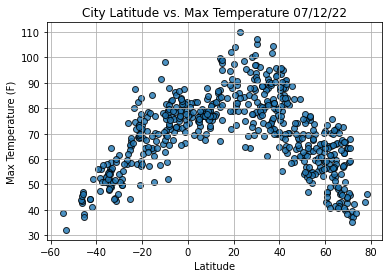

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

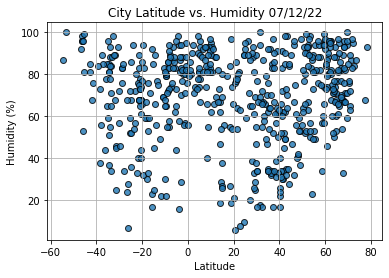

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

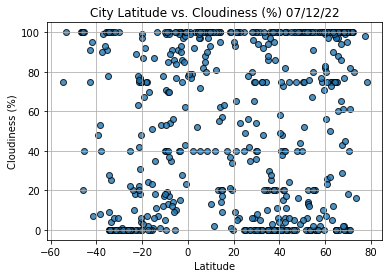

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

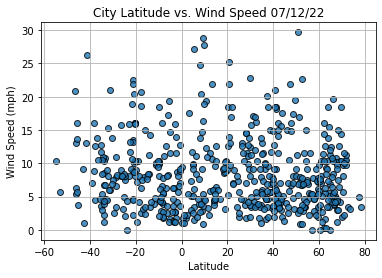

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()